## Import Libraries

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Data Import and Overview

In [69]:
data = pd.read_excel(r"C:\Users\thora\Course Work\Marketing_Analysis_DAB303\Lab\Individual Project\Dataset.xlsx")

In [71]:
data.head()

,Date,Total by Sector,Automotive Fuel,Entertainment,Food and Drink,"Pubs, restaurants and fast food",Retail,Travel and accommodation,Total by Age,18-34,35-54,55+,Online
0,2020-01-01,113.90,125.01,113.52,101.79,119.09,119.98,106.45,113.90,105.14,126.32,103.74,22
1,2020-01-02,117.51,128.54,117.09,107.25,121.97,122.67,110.92,117.51,108.08,130.03,109.24,22
2,2020-01-03,117.63,132.20,115.70,107.47,122.00,121.45,112.93,117.63,108.42,129.62,110.33,22
3,2020-01-04,116.27,135.19,108.49,107.90,119.54,119.46,113.16,116.27,108.00,126.97,109.88,23
4,2020-01-05,113.75,135.02,99.38,107.01,113.30,118.46,112.29,113.75,106.90,122.95,107.43,24


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454 entries, 0 to 1453
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             1454 non-null   datetime64[ns]
 1   Total by Sector                  1454 non-null   float64       
 2   Automotive Fuel                  1454 non-null   float64       
 3   Entertainment                    1454 non-null   float64       
 4   Food and Drink                   1454 non-null   float64       
 5   Pubs, restaurants and fast food  1454 non-null   float64       
 6   Retail                           1454 non-null   float64       
 7   Travel and accommodation         1454 non-null   float64       
 8   Total by Age                     1454 non-null   float64       
 9   18-34                            1454 non-null   float64       
 10  35-54                            1454 non-null   float64    

## 2. Data Cleaning

### 2.1. Handle Missing Data

In [13]:
data.isnull().sum()

Date                               0
Total by Sector                    0
Automotive Fuel                    0
Entertainment                      0
Food and Drink                     0
Pubs, restaurants and fast food    0
Retail                             0
Travel and accommodation           0
Total by Age                       0
18-34                              0
35-54                              0
55+                                0
Online                             0
dtype: int64

In [15]:
print(data.columns)

Index(['Date', 'Total by Sector', 'Automotive Fuel', 'Entertainment',
       'Food and Drink', 'Pubs, restaurants and fast food', 'Retail',
       'Travel and accommodation', 'Total by Age', '18-34', '35-54', '55+',
       'Online'],
      dtype='object')


## 3. Exploratory Data Analysis (EDA)

### 3.1 Descriptive Statisics

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Total by Sector,1454.0,109.840963,31.211462,36.92,84.1600,113.960,136.5200,166.85
Automotive Fuel,1454.0,130.299972,38.623408,40.16,97.5050,136.450,157.2925,212.72
Entertainment,1454.0,63.331761,31.389142,5.95,31.6875,72.235,87.8700,127.96
Food and Drink,1454.0,122.170475,20.487663,86.36,105.6925,114.615,140.6850,199.01
"Pubs, restaurants and fast food",1454.0,82.529319,33.852272,7.90,60.9825,91.445,106.3075,139.46
Retail,1454.0,141.308858,33.137576,55.79,117.0050,141.100,166.9275,232.23
Travel and accommodation,1454.0,89.998494,41.483328,5.70,51.0850,107.055,123.8175,147.30
Total by Age,1454.0,109.840963,31.211462,36.92,84.1600,113.960,136.5200,166.85
18-34,1454.0,125.778755,37.879451,40.33,94.1150,133.825,159.0525,188.36
35-54,1454.0,102.526960,27.538135,37.07,79.7750,106.755,122.6200,166.87


### 3.2 Outlier Analysis

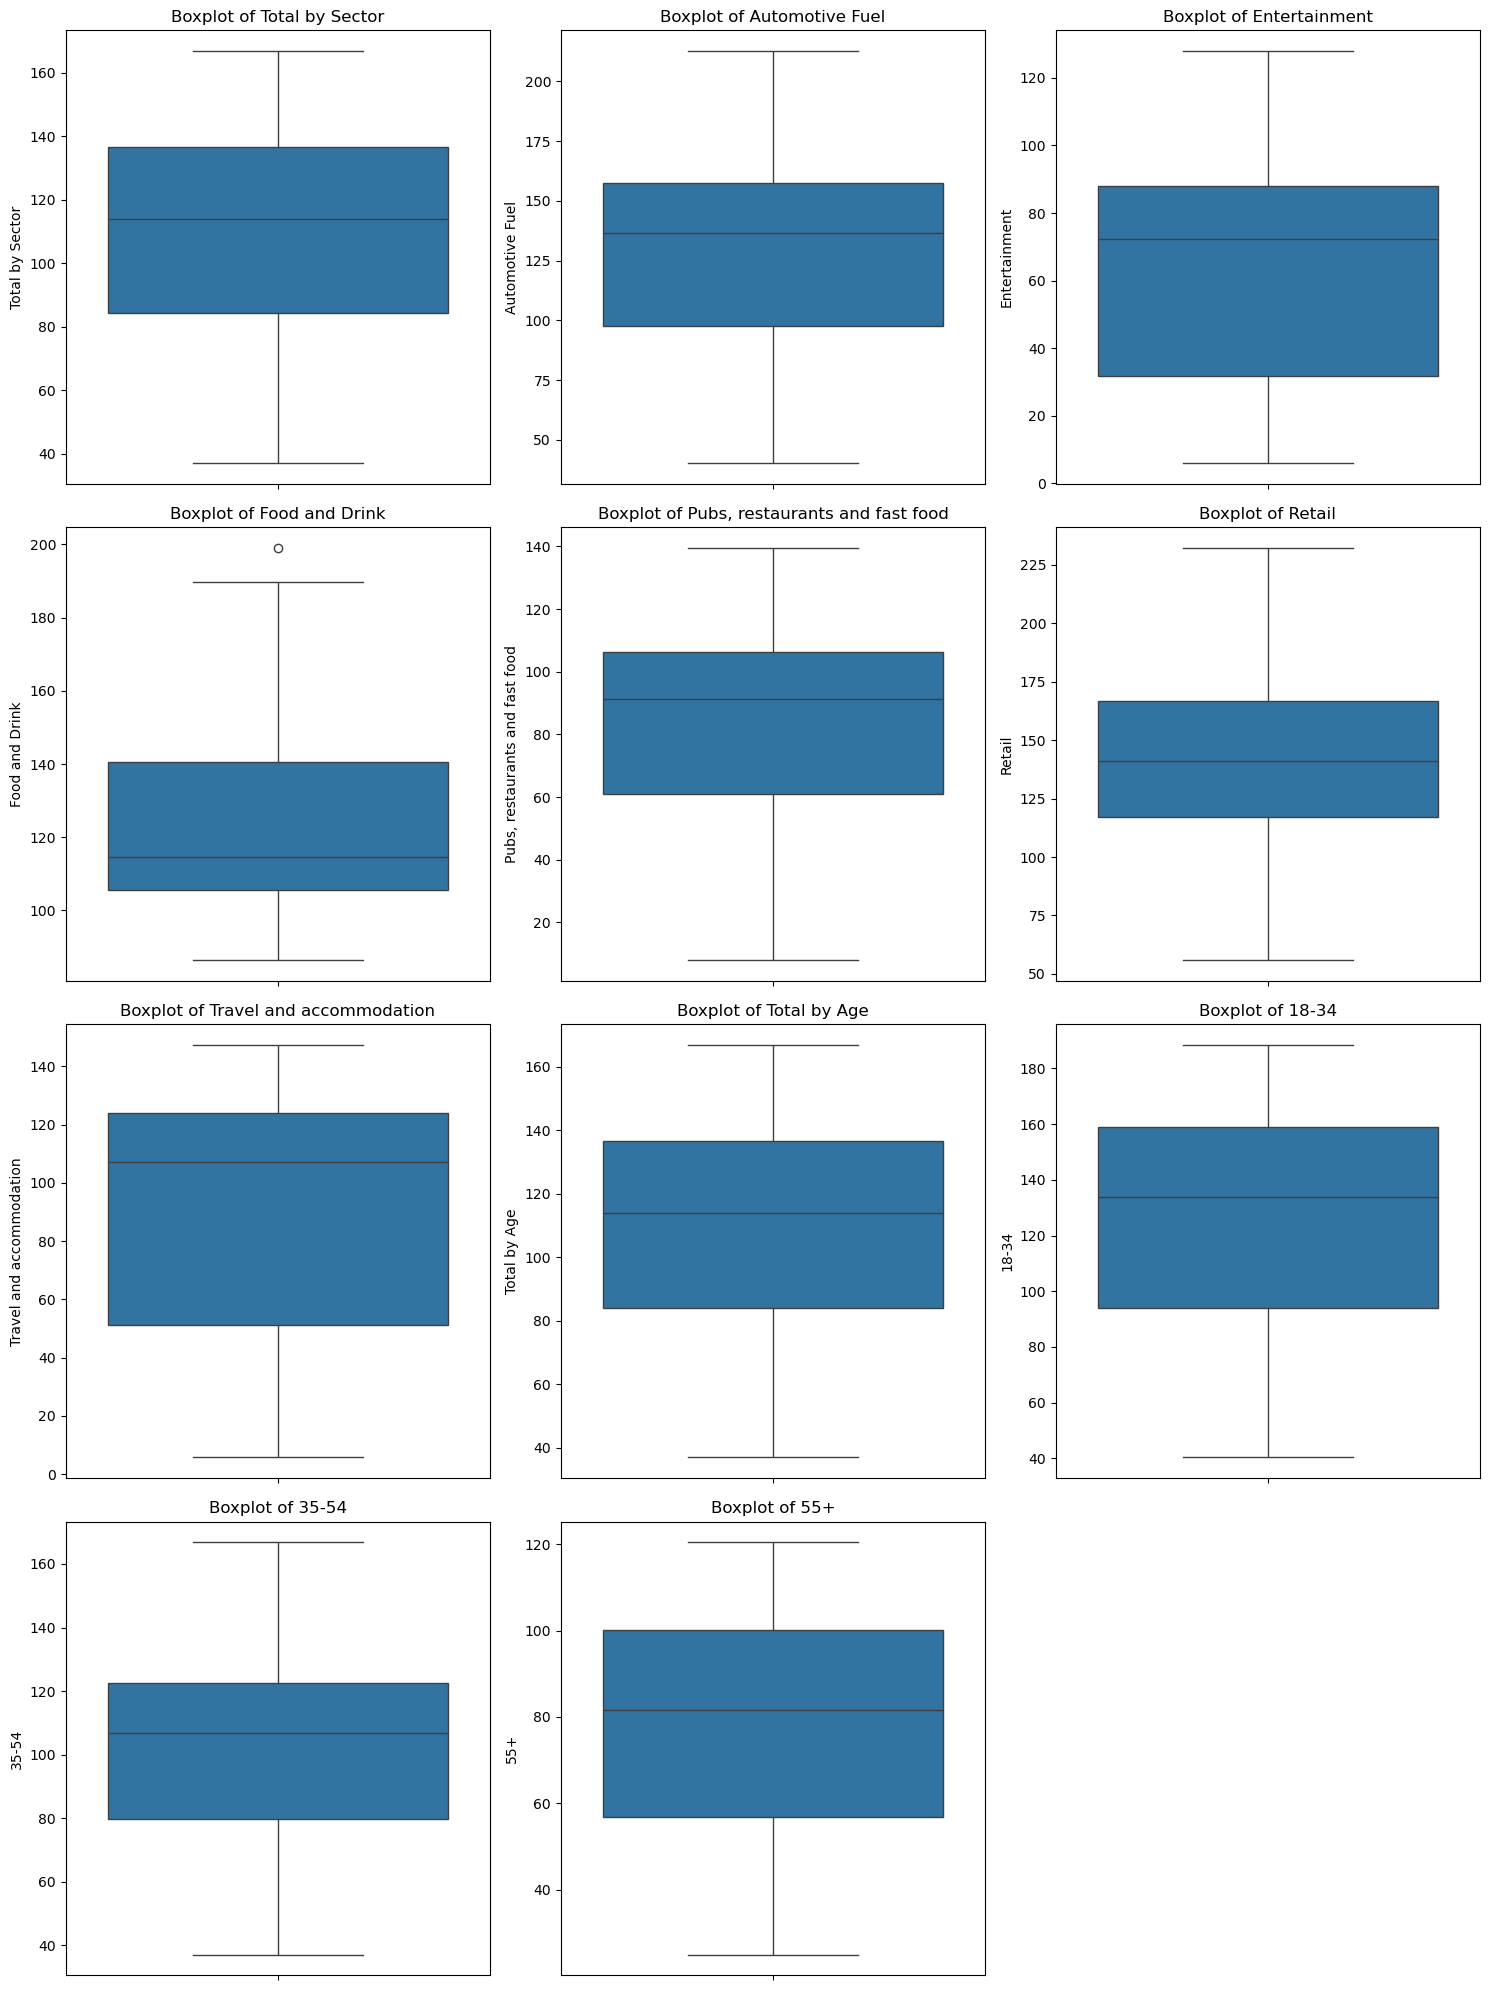

In [25]:
# Select the numerical columns
numerical_columns = data.select_dtypes(include=['float64']).columns

# Determine the number of rows and columns for the grid
num_plots = len(numerical_columns)
num_cols = 3  # You can adjust the number of columns here
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the required number of rows

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the array of axes for easy indexing

# Create boxplots for each numerical feature
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel(column)

# Hide any empty subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])  # Remove empty subplots

# Adjust layout
plt.tight_layout()
plt.show()

### 3.3 Time History Analysis

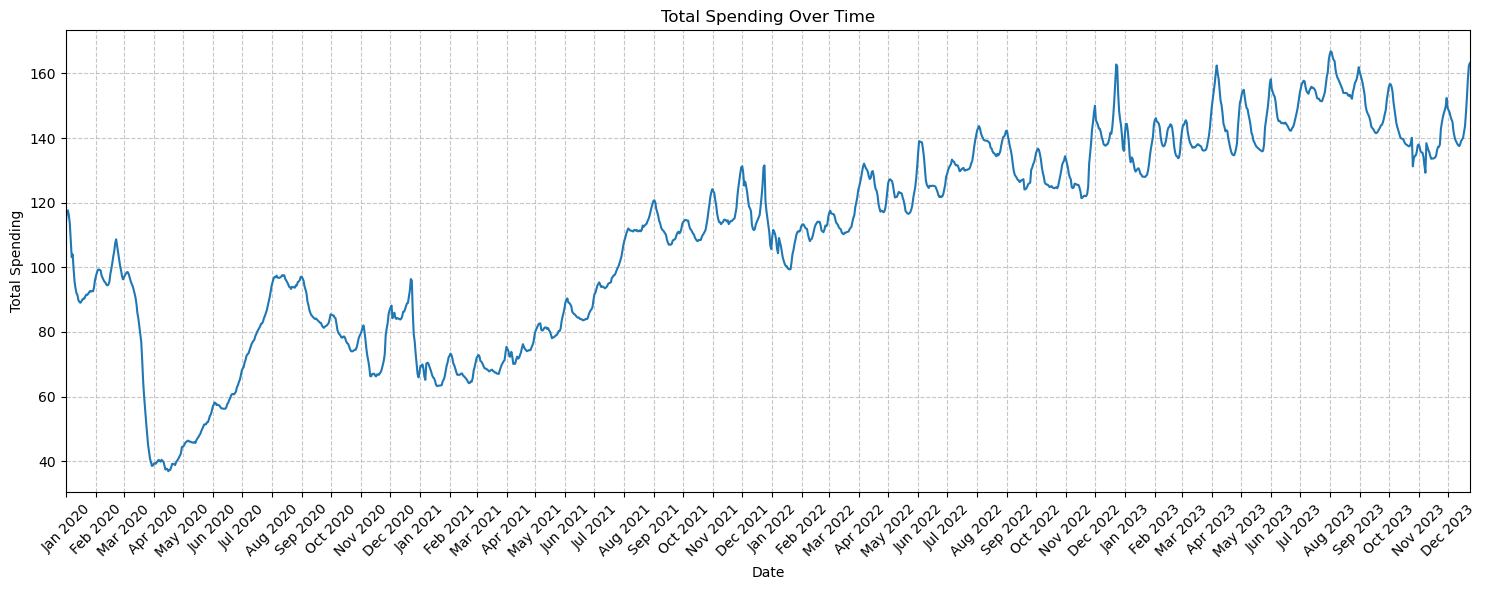

In [29]:
import matplotlib.dates as mdates 
plt.figure(figsize=(15, 6))

# Plotting the time series data
data.set_index('Date')['Total by Sector'].plot()

# Formatting the x-axis to show every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format ticks as 'Month Year'

# Adding title and labels
plt.title('Total Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Total Spending')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)  # Optional: Add a grid for better readability
plt.tight_layout()
plt.show()

### 3.3.1  Plot each sector over time to observe trends.

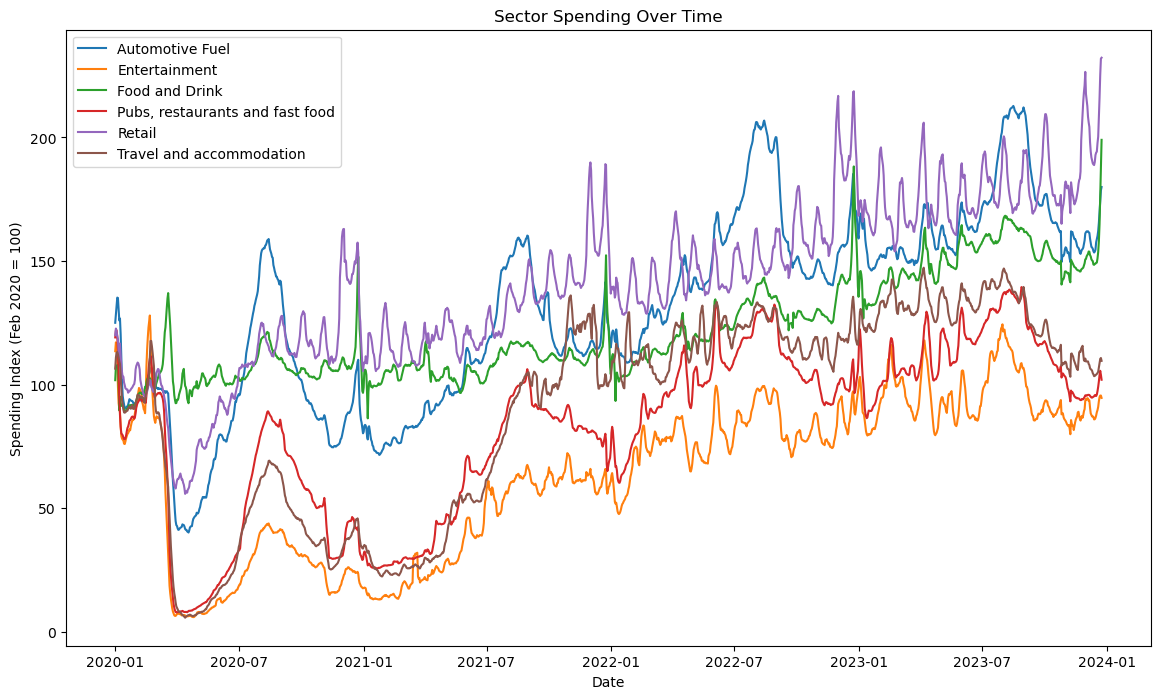

In [32]:
sectors = ["Automotive Fuel", "Entertainment", "Food and Drink", "Pubs, restaurants and fast food", "Retail", "Travel and accommodation"]
plt.figure(figsize=(14, 8))
for sector in sectors:
    plt.plot(data['Date'], data[sector], label=sector)
plt.title("Sector Spending Over Time")
plt.xlabel("Date")
plt.ylabel("Spending Index (Feb 2020 = 100)")
plt.legend()
plt.show()

### 3.4 Overview of Spending Categories

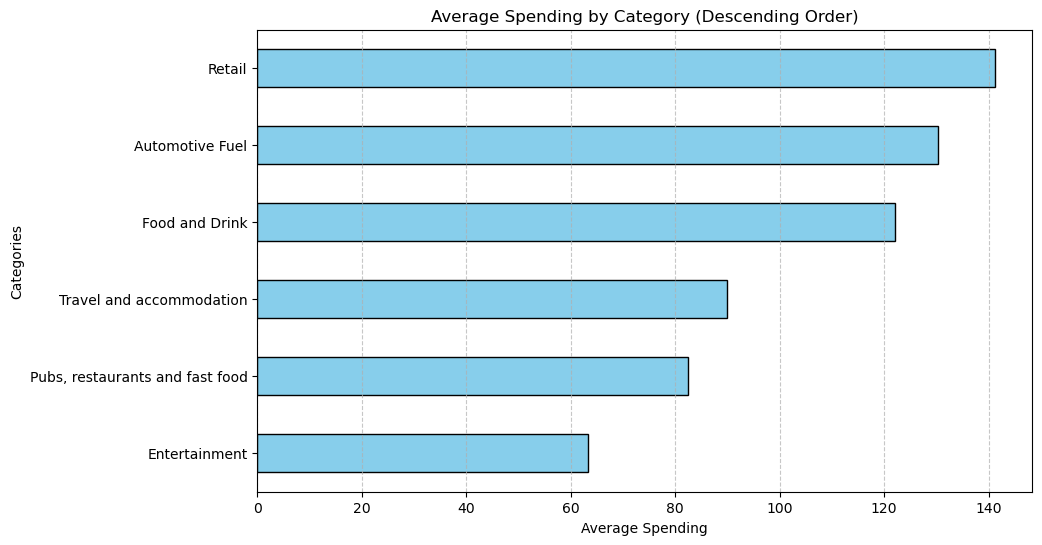

In [35]:
import matplotlib.pyplot as plt

# Calculate the mean spending for each category
category_spending = data[['Automotive Fuel', 'Entertainment', 'Food and Drink', 
                          'Pubs, restaurants and fast food', 'Retail', 
                          'Travel and accommodation']].mean()

# Sort the categories by spending in descending order
category_spending = category_spending.sort_values(ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
category_spending.plot(kind='barh', color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Average Spending by Category (Descending Order)")
plt.xlabel("Average Spending")
plt.ylabel("Categories")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest spending at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### 3.5  Time-based Trends

C:\Users\thora\AppData\Local\Temp\ipykernel_22324\2993648960.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  spending_by_day = data.groupby('Day_of_Week').mean()


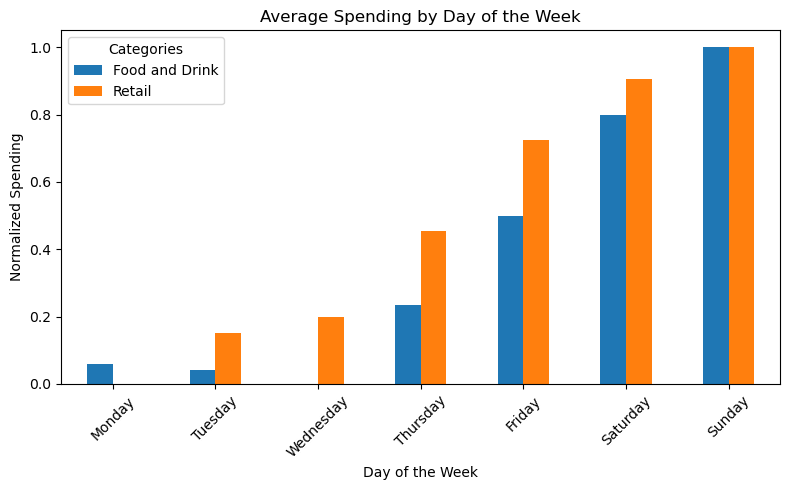

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame and 'Date' is already converted to datetime format

# Step 1: Add 'Day_of_Week' column
data['Day_of_Week'] = data['Date'].dt.day_name()

# Step 2: Group by day of the week and calculate the mean
spending_by_day = data.groupby('Day_of_Week').mean()

# Step 3: Normalize the data to highlight smaller variations
scaler = MinMaxScaler()
spending_by_day[['Food and Drink', 'Retail']] = scaler.fit_transform(spending_by_day[['Food and Drink', 'Retail']])

# Step 4: Reorder the index to ensure consistent display of days of the week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
spending_by_day = spending_by_day.reindex(ordered_days)

# Step 5: Plot the result
spending_by_day[['Food and Drink', 'Retail']].plot(kind='bar', figsize=(8, 5))

# Add titles and labels
plt.title('Average Spending by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Normalized Spending')
plt.xticks(rotation=45)
plt.legend(title='Categories')
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

### 3.6 Demographic Analysis

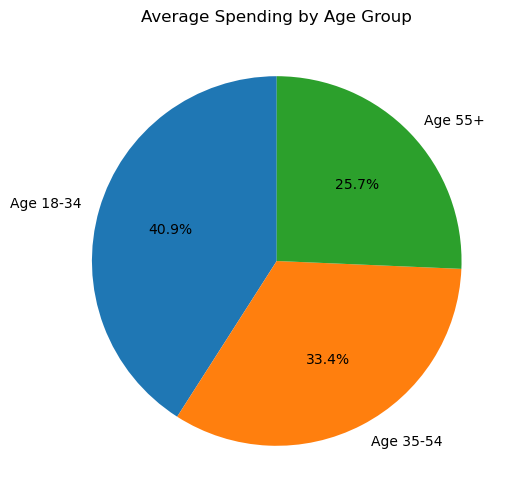

In [41]:
age_spending = data[['18-34', '35-54', '55+']].mean()

# Add 'Age' prefix to the labels
labels = [f'Age {age_group}' for age_group in age_spending.index]

# Plot the pie chart with custom labels
age_spending.plot(
    kind='pie', 
    labels=labels, 
    autopct='%1.1f%%', 
    figsize=(6, 6), 
    startangle=90, 
    legend=False
)

# Add title
plt.title('Average Spending by Age Group')
plt.ylabel('')  # Removes the y-axis label
plt.show()

# 4. Customer Behavior Analysis

### 4.1 Sectoral Correlation: 
Calculate correlations between different sectors to see if spending in one sector tends to rise with another.

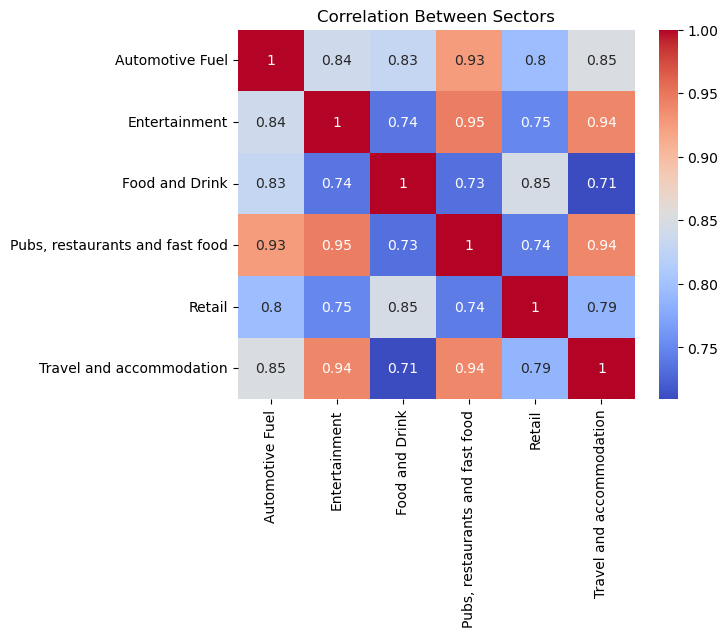

In [45]:
correlation_matrix = data[sectors].corr()
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Sectors")
plt.show()

### 4.2 Feature Engineering

In [48]:
# Creating new features
data['Need'] = data['Food and Drink'] + data['Retail']
data['Want'] = data['Entertainment']+data['Pubs, restaurants and fast food']
data['Need_to_Want_ratio'] =data['Need'] / data['Want']

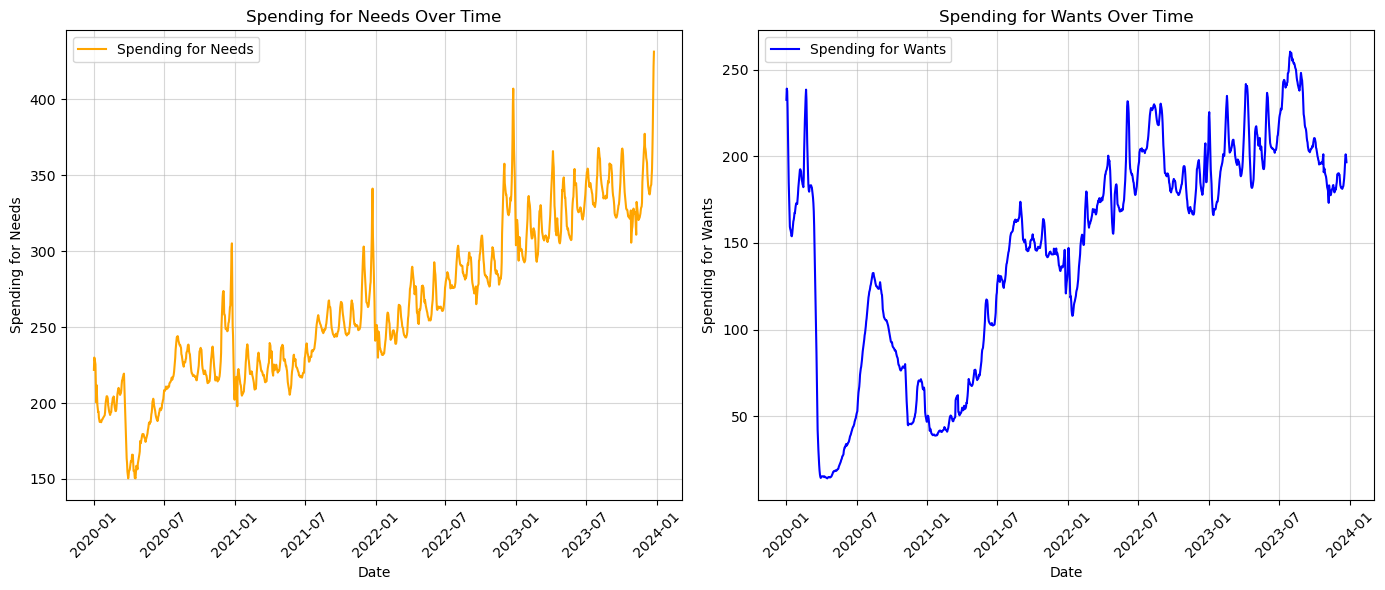

In [50]:
plt.figure(figsize=(14, 6))

# Plot 1: Spending for Needs
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(data['Date'], data['Need'], label='Spending for Needs', color='orange')
plt.title("Spending for Needs Over Time")
plt.xlabel("Date")
plt.ylabel("Spending for Needs")
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.5)

# Plot 2: Spending for Wants
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(data['Date'], data['Want'], label='Spending for Wants', color='blue')
plt.title("Spending for Wants Over Time")
plt.xlabel("Date")
plt.ylabel("Spending for Wants")
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

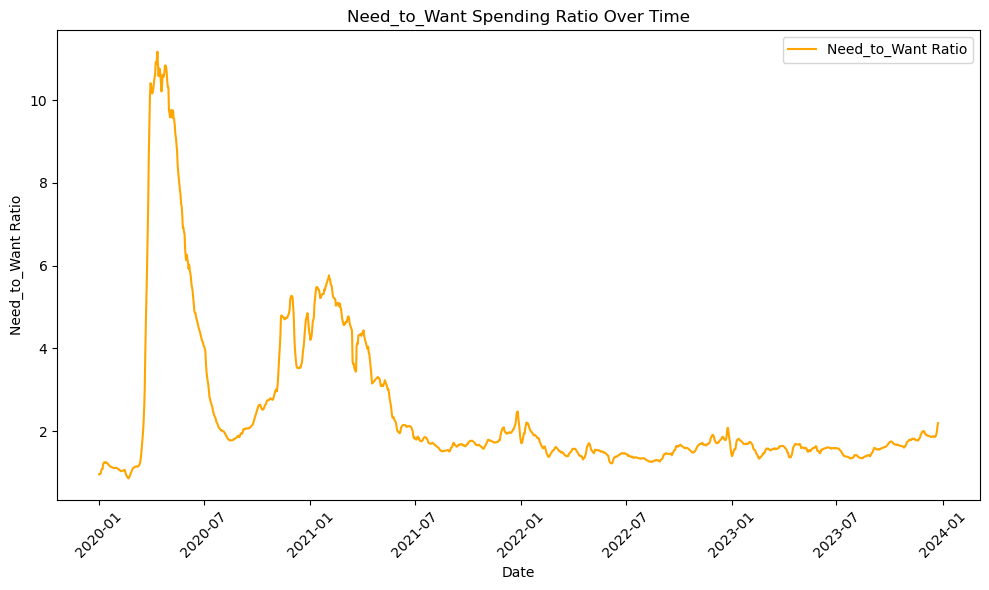

In [51]:
# Plot Food-to-Retail Ratio over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Need_to_Want_ratio'], label='Need_to_Want Ratio', color='orange')
plt.title("Need_to_Want Spending Ratio Over Time")
plt.xlabel("Date")
plt.ylabel("Need_to_Want Ratio")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.3 Identify Periodic Trends
Use seasonal_decompose from statsmodels to see components like trend, seasonality, and residuals in time series.

<Figure size 1000x800 with 0 Axes>

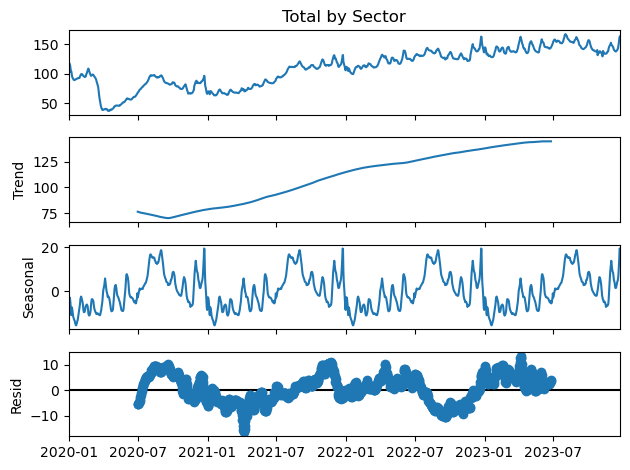

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming 'Date' is already set as the index for time series analysis
data.set_index('Date', inplace=True)

# Decompose the time series with annual seasonality
result = seasonal_decompose(data['Total by Sector'], model='additive', period=365)

# Plot the decomposition
plt.figure(figsize=(10, 8))
result.plot()
plt.show()

### 4.4 Analyze Spending During Specific Periods
look at how spending changes around the holidays or other known events.

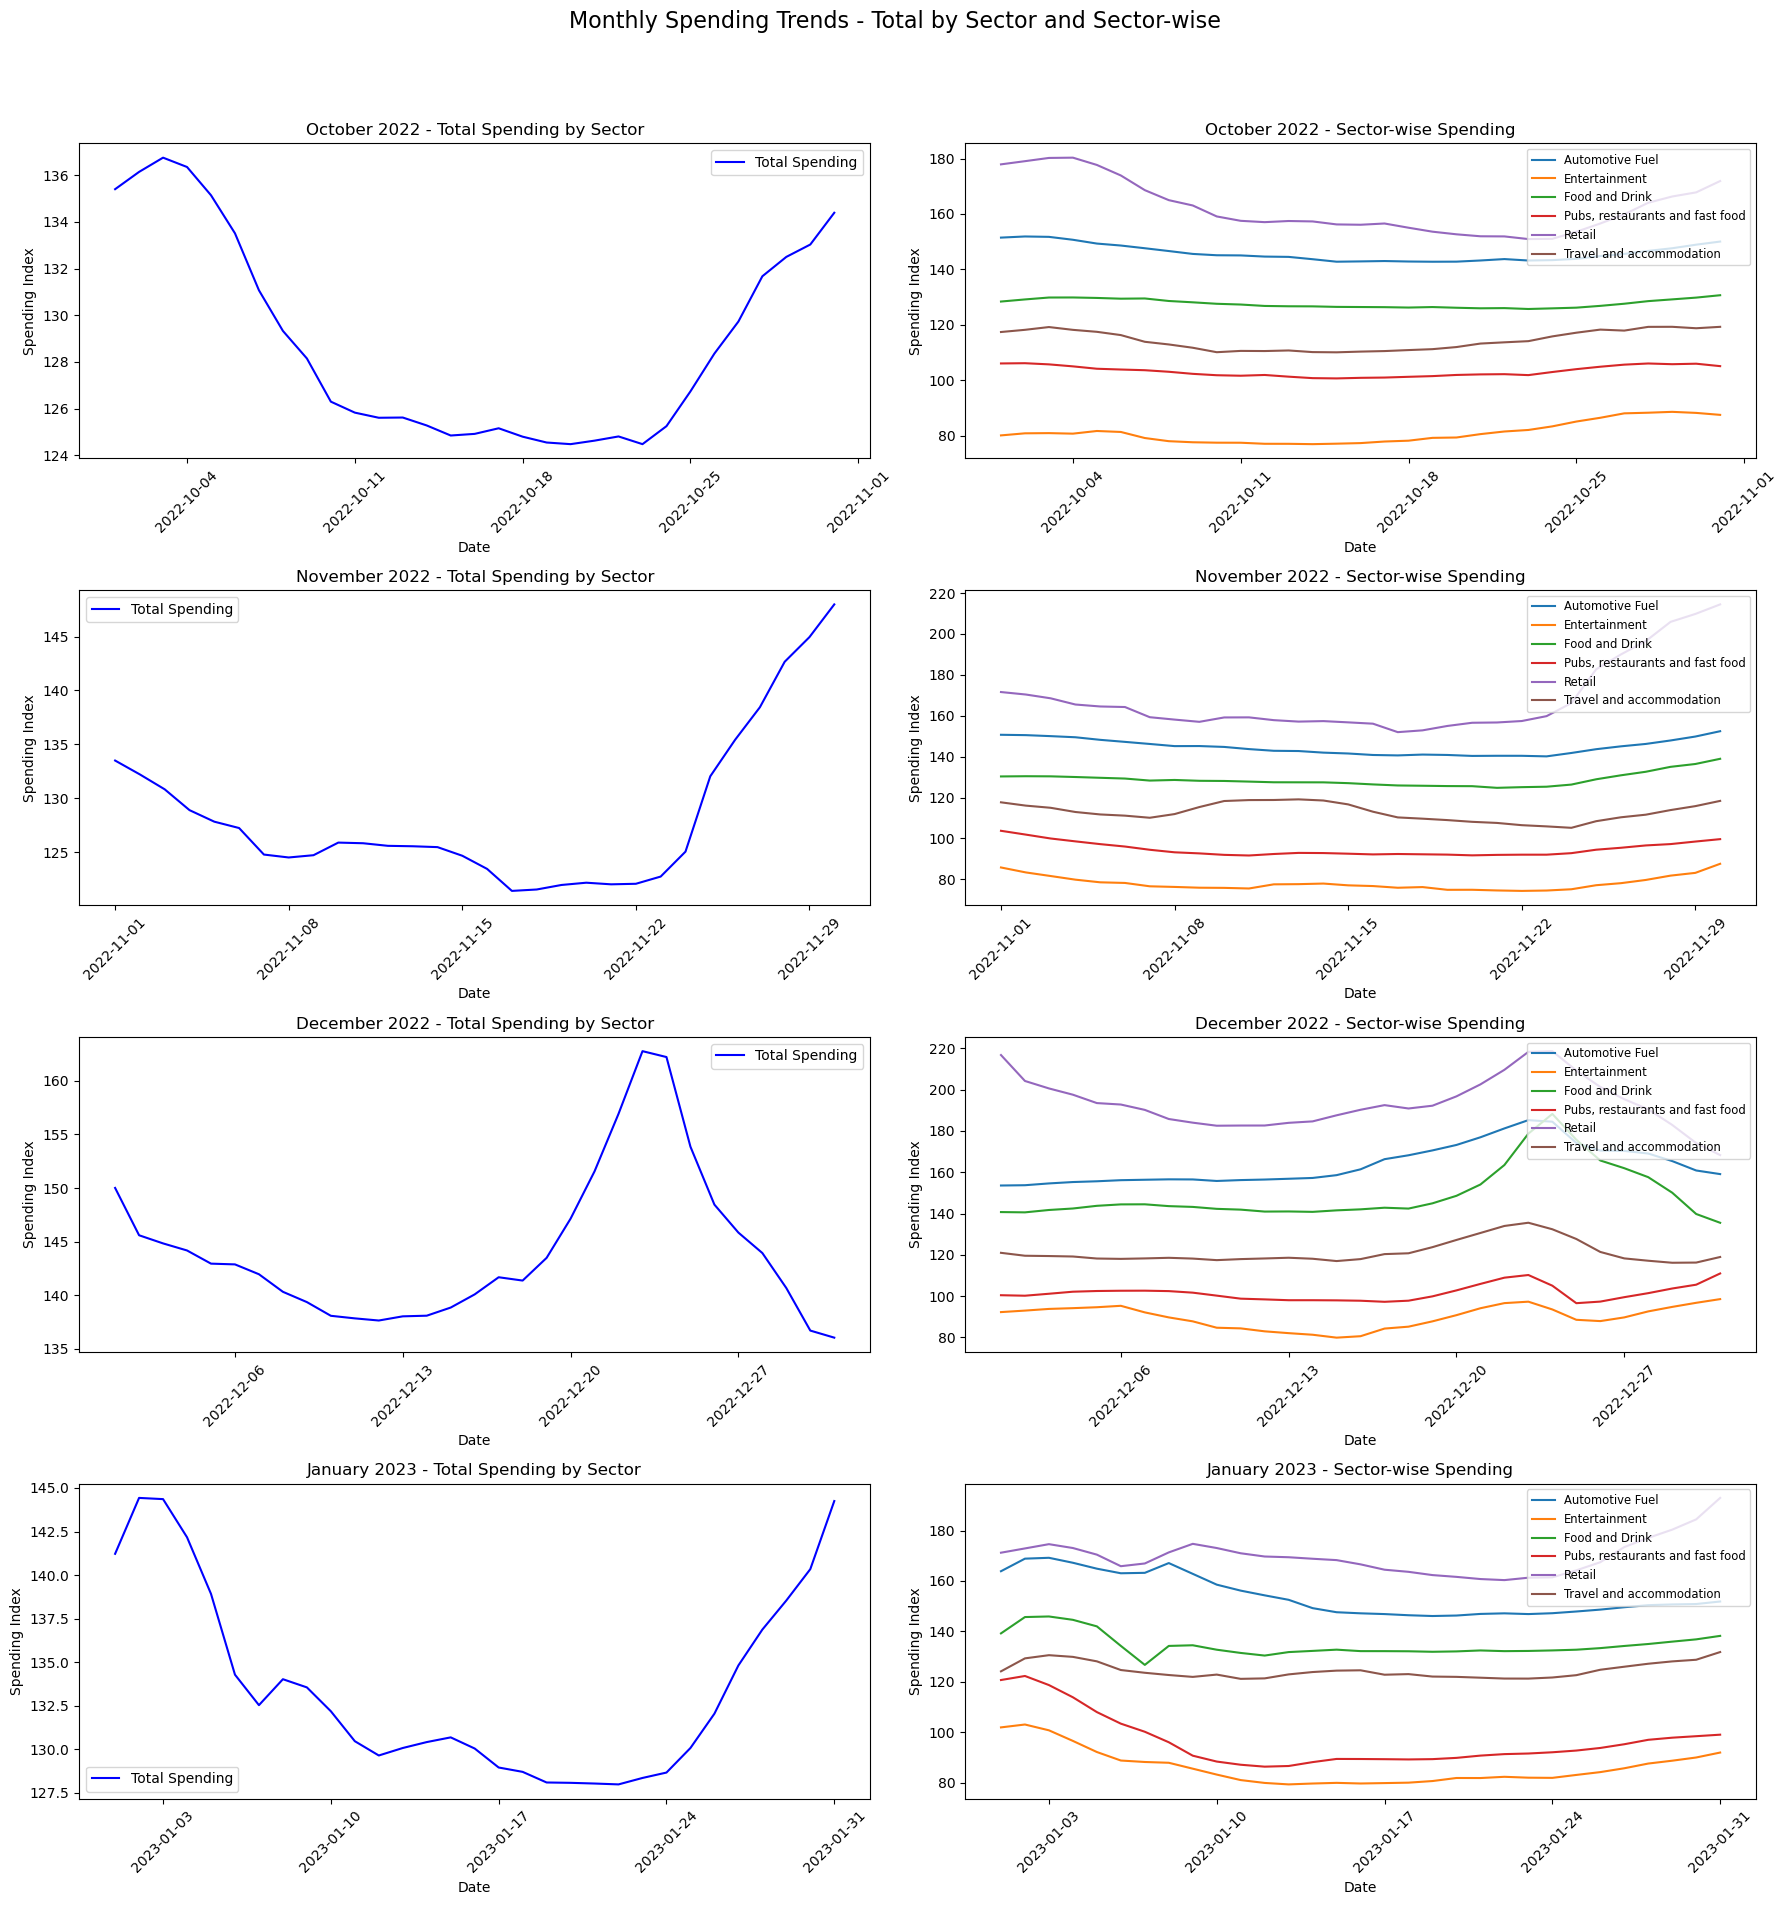

In [57]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
# Define the months and date ranges for each
months = {
    'October 2022': ('2022-10-01', '2022-10-31'),
    'November 2022': ('2022-11-01', '2022-11-30'),
    'December 2022': ('2022-12-01', '2022-12-31'),
    'January 2023': ('2023-01-01', '2023-01-31')
}

# List of sectors to plot
sectors = ['Automotive Fuel', 'Entertainment', 'Food and Drink', 
           'Pubs, restaurants and fast food', 'Retail', 'Travel and accommodation']

# Create a 4x2 grid plot for displaying total and sector-wise plots side by side
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
fig.suptitle("Monthly Spending Trends - Total by Sector and Sector-wise", fontsize=16)
axes = axes.flatten()  # Flatten for easier indexing

# Iterate over each month for plotting
for i, (month_name, (start_date, end_date)) in enumerate(months.items()):
    # Filter data for the specific month
    monthly_data = data[(data.index >= start_date) & (data.index <= end_date)]
    
    # Plot 1: Total Spending by Sector for the month
    axes[2*i].plot(monthly_data.index, monthly_data['Total by Sector'], color='blue', label='Total Spending')
    axes[2*i].set_title(f"{month_name} - Total Spending by Sector")
    axes[2*i].set_xlabel("Date")
    axes[2*i].set_ylabel("Spending Index")
    axes[2*i].xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
    axes[2*i].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    axes[2*i].tick_params(axis='x', rotation=45)
    axes[2*i].legend()
    
    # Plot 2: Sector-wise Spending for the month
    for sector in sectors:
        axes[2*i + 1].plot(monthly_data.index, monthly_data[sector], label=sector)
    
    axes[2*i + 1].set_title(f"{month_name} - Sector-wise Spending")
    axes[2*i + 1].set_xlabel("Date")
    axes[2*i + 1].set_ylabel("Spending Index")
    axes[2*i + 1].xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
    axes[2*i + 1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    axes[2*i + 1].tick_params(axis='x', rotation=45)
    axes[2*i + 1].legend(loc='upper right', fontsize='small')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leaves space for the suptitle
plt.show()

# Predicative Analysis Model : Random Forest

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you want to predict 'Total by Sector'
X = data[['18-34', '35-54', '55+', 'Pubs, restaurants and fast food', 'Retail', 'Entertainment']]  # Example features
y = data['Total by Sector']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.3558837706529185
R-squared: 0.9995892658974759


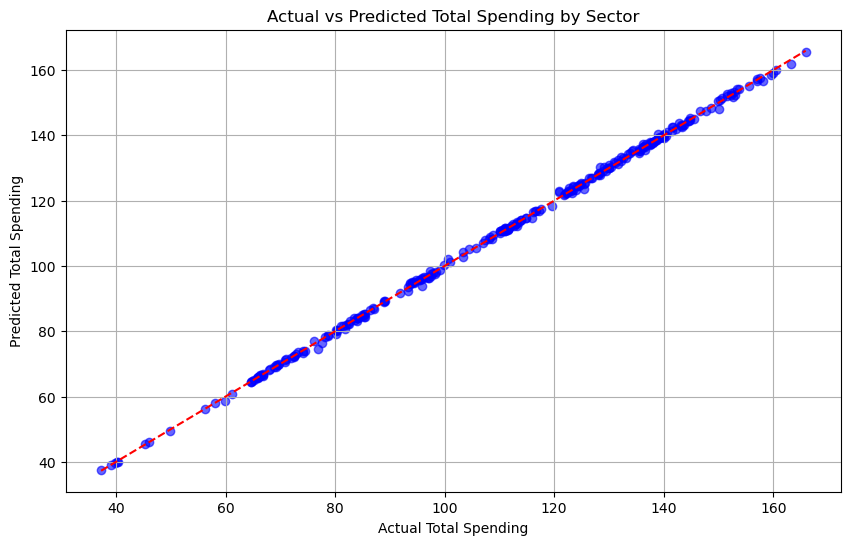

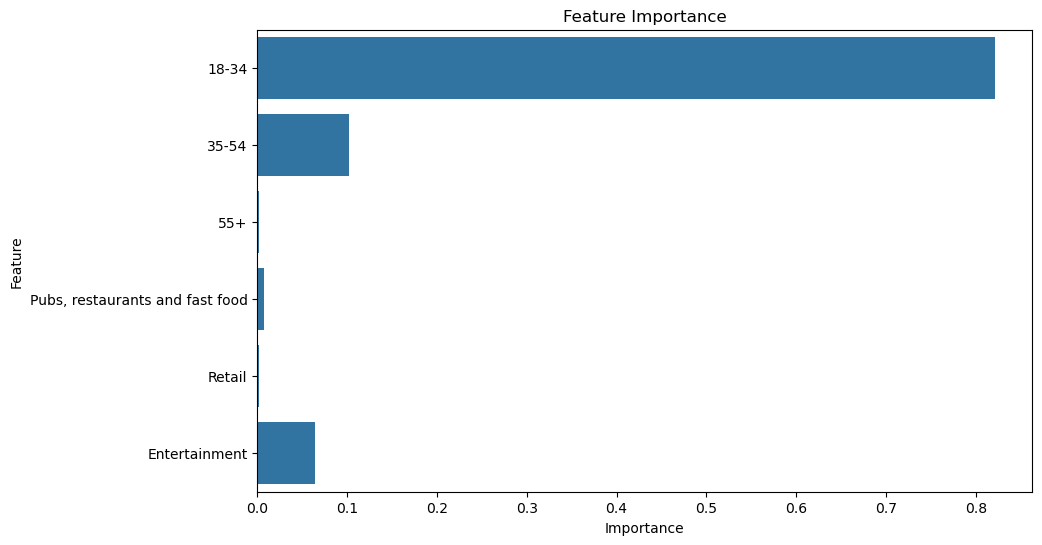

In [60]:
# Step 1: Plot Actual vs Predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Total Spending by Sector')
plt.xlabel('Actual Total Spending')
plt.ylabel('Predicted Total Spending')
plt.grid(True)
plt.show()

# Step 2: Plot Feature Importance from Random Forest Regressor

feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

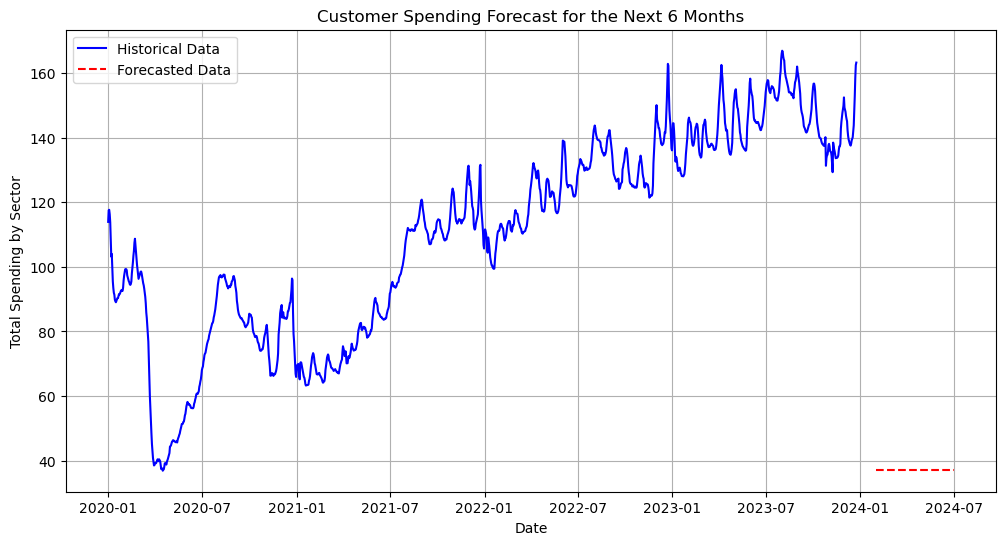

In [75]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Prepare future dates (simulate future periods)
last_date = data['Date'].max()  # Last date in the dataset
future_dates = pd.date_range(last_date, periods=7, freq='M')[1:]  # Next 6 months (skip the last date)

# Create a new DataFrame for future predictions
# Ensure you use the same columns as the ones used during training
# Here I assume these are your model's feature columns
feature_columns = ['18-34', '35-54', '55+', 'Pubs, restaurants and fast food', 'Retail', 'Entertainment']

future_data = pd.DataFrame({
    'Date': future_dates,
    'Entertainment': np.zeros(len(future_dates)),  # Adjust with appropriate assumptions
    'Pubs, restaurants and fast food': np.zeros(len(future_dates)),
    'Retail': np.zeros(len(future_dates)),
    '18-34': np.zeros(len(future_dates)),  # Adjust if you have specific forecasted values
    '35-54': np.zeros(len(future_dates)),
    '55+': np.zeros(len(future_dates)),
})

# Step 2: Predict future values using the trained model
# Make sure future_data contains the same feature columns in the same order as training data
future_features = future_data[feature_columns]  # Adjust this to match your trained model's features
future_predictions = rf_model.predict(future_features)  # Use the trained Random Forest model

# Add the predictions to the future_data DataFrame
future_data['Predicted Total by Sector'] = future_predictions

# Step 3: Plot historical vs forecasted data
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(data['Date'], data['Total by Sector'], label='Historical Data', color='blue')

# Plot future forecasted data
plt.plot(future_data['Date'], future_data['Predicted Total by Sector'], label='Forecasted Data', color='red', linestyle='--')

# Add labels and title
plt.title('Customer Spending Forecast for the Next 6 Months')
plt.xlabel('Date')
plt.ylabel('Total Spending by Sector')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# 5. Segmentation Analysis

Identify customer segments based on their spending behavior.

### 5.1. Feature Selection
Select relevant features for clustering (e.g., Total by Sector, 18-34, 35-54, 55+).

### 5.2. Apply K-means Clustering
Perform clustering to group similar customers.

In [79]:
# Ensure 'Date' column is datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract the month from the 'Date' column and create a new 'Month' column
data['Month'] = data['Date'].dt.month

# Group by 'Month' and calculate the mean for each sector
monthly_mean_all_years = data.groupby('Month').mean(numeric_only=True).reset_index()

# Display the resulting DataFrame
print(monthly_mean_all_years)

    Month  Total by Sector  Automotive Fuel  Entertainment  Food and Drink  \
0       1       100.968548       112.032823      60.700323      108.349435   
1       2       104.764425       112.142832      73.278938      113.917522   
2       3        99.698790       112.227581      60.476290      119.224435   
3       4        96.074833       110.407667      51.701500      118.009417   
4       5        99.076452       114.969355      51.029113      118.601694   
5       6       104.992417       130.430333      57.619333      122.107667   
6       7       115.784677       153.749597      69.562016      126.667016   
7       8       126.270565       179.396613      78.096452      134.077500   
8       9       118.843167       150.032167      66.487333      125.414333   
9      10       115.670645       129.884919      65.839274      123.427661   
10     11       114.226500       123.685833      61.135000      123.260083   
11     12       121.775299       132.965385      64.473932      

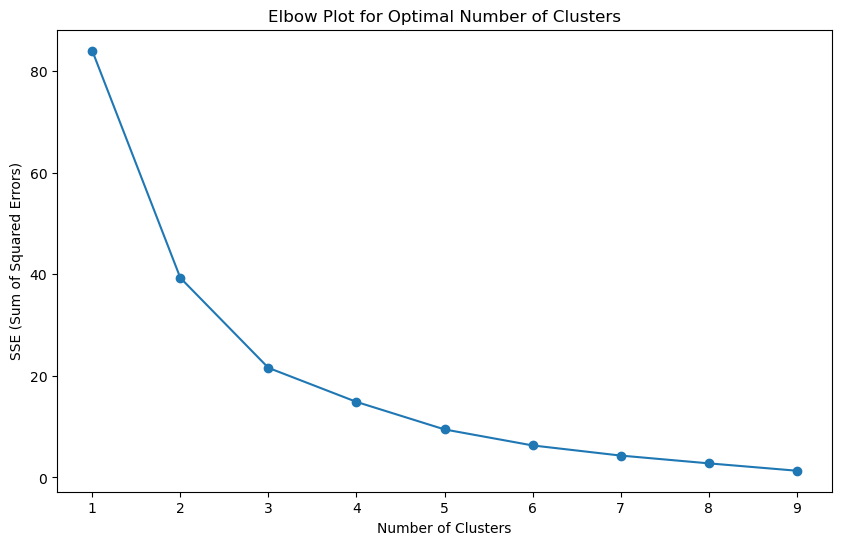

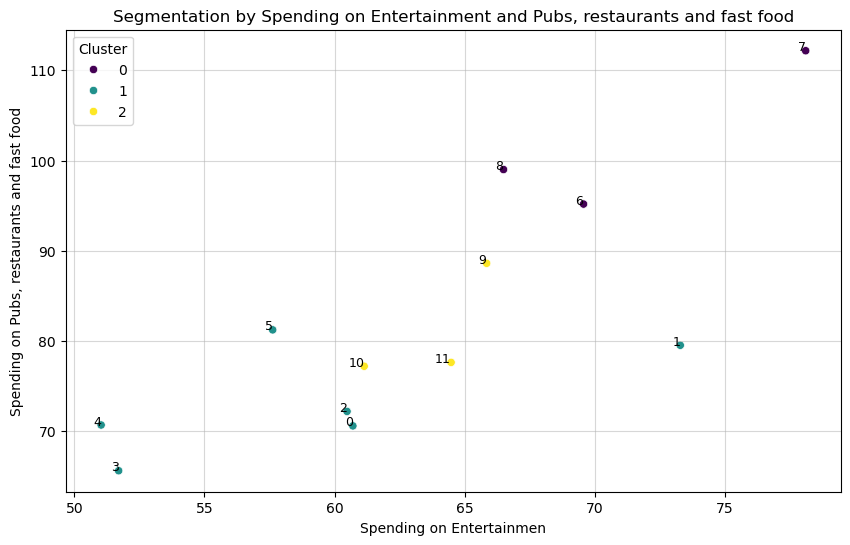

In [81]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak on Windows with MKL")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for segmentation and fill any missing values
# Consider adding more features like 'Total by Sector' or 'Age groups' if available
X = monthly_mean_all_years[[ 'Total by Sector',  'Automotive Fuel','Entertainment', 'Pubs, restaurants and fast food','Retail' ,'Travel and accommodation','Online']].fillna(0)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters with elbow plot
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)  # Explicitly setting n_init=10
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.show()

# Choose the optimal number of clusters (e.g., 3) and fit KMeans
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
monthly_mean_all_years['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters by spending on chosen features
plt.figure(figsize=(10, 6))

# Scatter plot with clusters
scatter = sns.scatterplot(
    x='Entertainment', 
    y='Pubs, restaurants and fast food', 
    hue='Cluster', 
    data=monthly_mean_all_years, 
    palette='viridis'
)

# Add month names as annotations
for i in range(monthly_mean_all_years.shape[0]):
    plt.text(
        x=monthly_mean_all_years['Entertainment'].iloc[i], 
        y=monthly_mean_all_years['Pubs, restaurants and fast food'].iloc[i], 
        s=monthly_mean_all_years.index[i],  # Assuming index has month names
        fontsize=9, 
        ha='right', 
        color='black'
    )

# Add title and legend
plt.title('Segmentation by Spending on Entertainment and Pubs, restaurants and fast food')
plt.xlabel('Spending on Entertainmen')
plt.ylabel('Spending on Pubs, restaurants and fast food')
plt.legend(title='Cluster')
plt.grid(alpha=0.5)

plt.show()

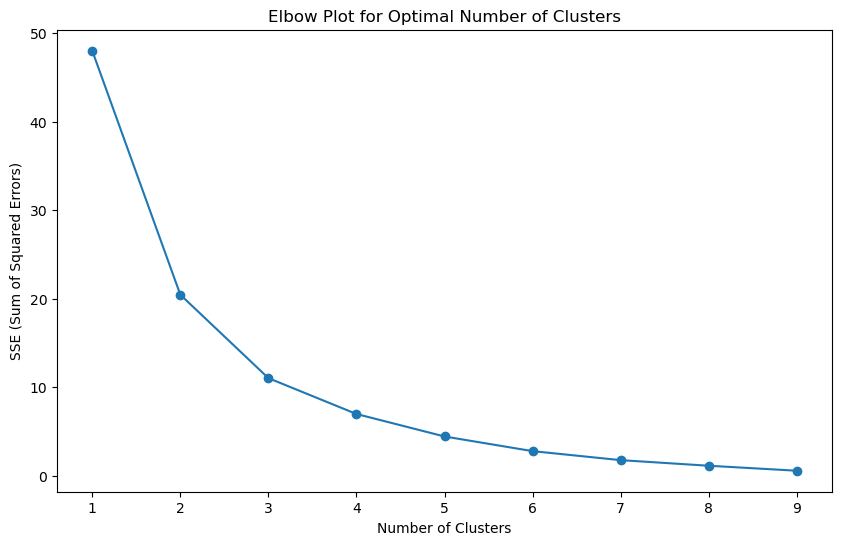

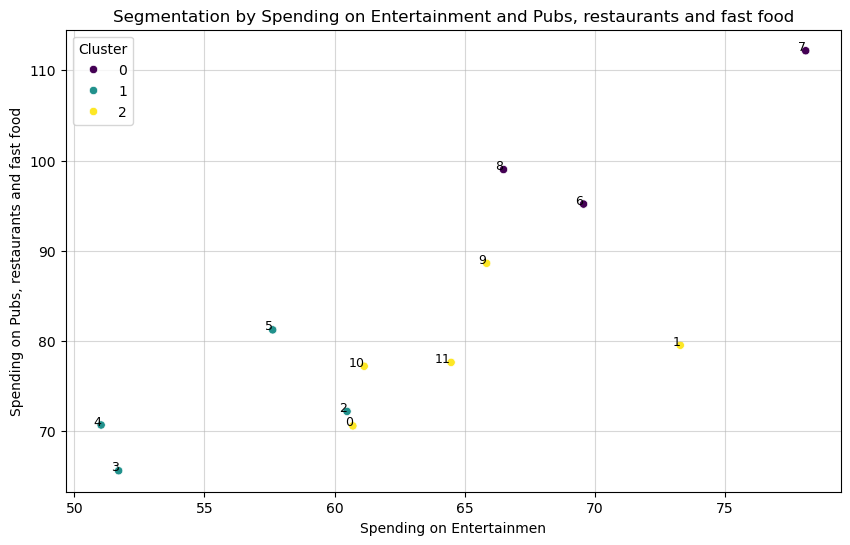

In [82]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak on Windows with MKL")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for segmentation and fill any missing values
# Consider adding more features like 'Total by Sector' or 'Age groups' if available
X = monthly_mean_all_years[['Automotive Fuel','Entertainment', 'Pubs, restaurants and fast food', 'Travel and accommodation']].fillna(0)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters with elbow plot
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)  # Explicitly setting n_init=10
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.show()

# Choose the optimal number of clusters (e.g., 3) and fit KMeans
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
monthly_mean_all_years['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters by spending on chosen features
plt.figure(figsize=(10, 6))

# Scatter plot with clusters
scatter = sns.scatterplot(
    x='Entertainment', 
    y='Pubs, restaurants and fast food', 
    hue='Cluster', 
    data=monthly_mean_all_years, 
    palette='viridis'
)

# Add month names as annotations
for i in range(monthly_mean_all_years.shape[0]):
    plt.text(
        x=monthly_mean_all_years['Entertainment'].iloc[i], 
        y=monthly_mean_all_years['Pubs, restaurants and fast food'].iloc[i], 
        s=monthly_mean_all_years.index[i],  # Assuming index has month names
        fontsize=9, 
        ha='right', 
        color='black'
    )

# Add title and legend
plt.title('Segmentation by Spending on Entertainment and Pubs, restaurants and fast food')
plt.xlabel('Spending on Entertainmen')
plt.ylabel('Spending on Pubs, restaurants and fast food')
plt.legend(title='Cluster')
plt.grid(alpha=0.5)

plt.show()

In [83]:
# Group months by their clusters
months_by_cluster = monthly_mean_all_years.groupby('Cluster')['Month'].apply(list).reset_index()

# Map the month numbers to month names
import calendar
months_by_cluster['Month'] = months_by_cluster['Month'].apply(lambda x: [calendar.month_name[month] for month in x])

# Display the months in each cluster
print(months_by_cluster)

   Cluster                                             Month
0        0                         [July, August, September]
1        1                         [March, April, May, June]
2        2  [January, February, October, November, December]


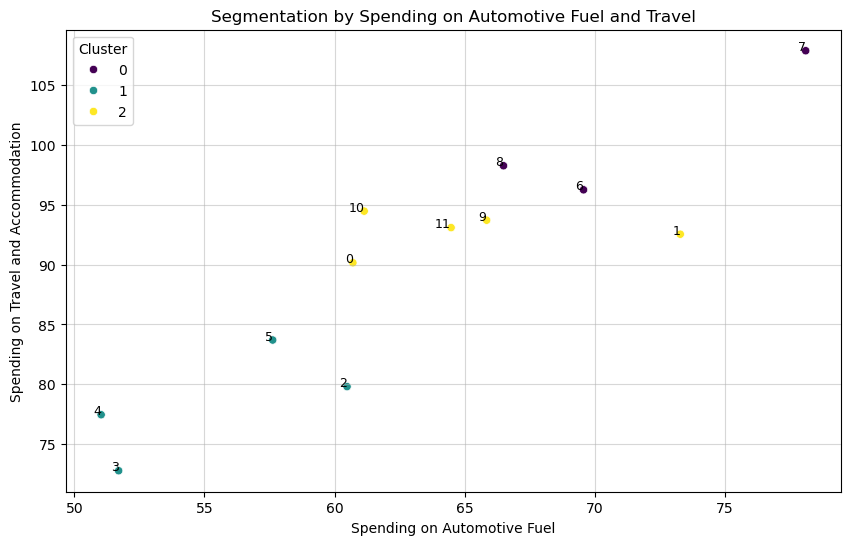

In [84]:
plt.figure(figsize=(10, 6))

# Scatter plot with clusters
scatter = sns.scatterplot(
    x='Entertainment', 
    y='Travel and accommodation', 
    hue='Cluster', 
    data=monthly_mean_all_years, 
    palette='viridis'
)

# Add month names as annotations
for i in range(monthly_mean_all_years.shape[0]):
    plt.text(
        x=monthly_mean_all_years['Entertainment'].iloc[i], 
        y=monthly_mean_all_years['Travel and accommodation'].iloc[i], 
        s=monthly_mean_all_years.index[i],  # Assuming index has month names
        fontsize=9, 
        ha='right', 
        color='black'
    )

# Add title and legend
plt.title('Segmentation by Spending on Automotive Fuel and Travel')
plt.xlabel('Spending on Automotive Fuel')
plt.ylabel('Spending on Travel and Accommodation')
plt.legend(title='Cluster')
plt.grid(alpha=0.5)

plt.show()